In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_iris
from math import pi
from pandas.plotting import scatter_matrix
from pandas.plotting import andrews_curves


In [2]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')


Ahora vamos a hacernos las primeras preguntas:

1. ¿Cuántos datos hay en el dataset?
2. ¿Cuántas variables?
3. ¿Cuántos grupos de variables o categorías?
4.¿Cuántas observaciones corresponden a cada grupo?


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
iris.shape

(150, 5)

Vamos a quitar la variable Id que no nos interesa.

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

¿Qué medidas numéricas podemos obtener para describir los datos?

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Gráficamente, ¿Cómo podemos ver la cantidad de observaciones en cada grupo?


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



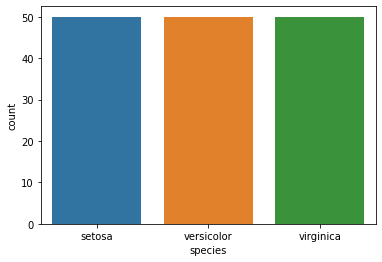

In [ ]:
sns.countplot('species', data=iris)
plt.show()

Veamos como hacer boxplots por grupos

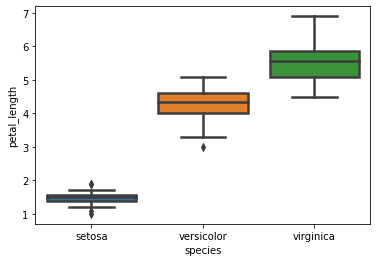

In [ ]:
# Boxplots
sns.boxplot(x="species", y="petal_length", data=iris, linewidth=2.5)
plt.show()

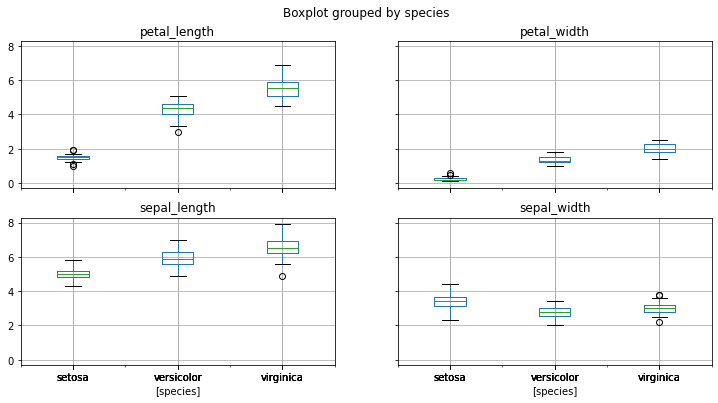

In [ ]:
# Boxplots para cada variable divididos por grupos en "species"
iris.boxplot(by="species", figsize=(12,6))
plt.show() # Esto último se pone cuando no se quiere que salga el último mensaje informativo

##### Veamos cómo hacer histogramas por grupos 

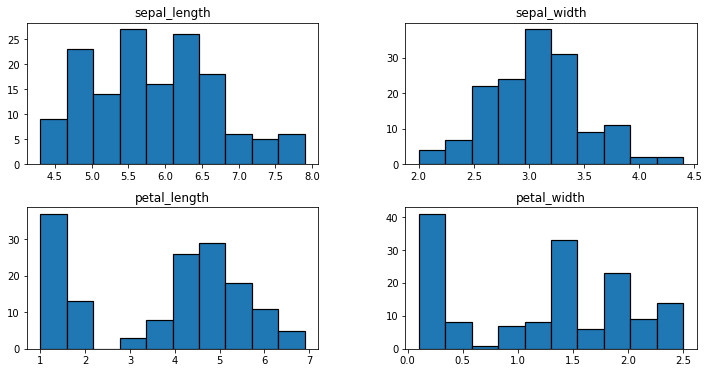

In [ ]:
# Histogramas
iris.hist(edgecolor='black', linewidth = 1.2, grid=False, figsize=(12,6))
plt.show()

In [ ]:
help(iris.hist)

Help on method hist_frame in module pandas.plotting._core:

hist_frame(column:collections.abc.Hashable=None, by=None, grid:bool=True, xlabelsize:Union[int, NoneType]=None, xrot:Union[float, NoneType]=None, ylabelsize:Union[int, NoneType]=None, yrot:Union[float, NoneType]=None, ax=None, sharex:bool=False, sharey:bool=False, figsize:Union[Tuple[int, int], NoneType]=None, layout:Union[Tuple[int, int], NoneType]=None, bins:Union[int, Sequence[int]]=10, backend:Union[str, NoneType]=None, legend:bool=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Make a histogram of the DataFrame's.
    
    A `histogram`_ is a representation of the distribution of data.
    This function calls :meth:`matplotlib.pyplot.hist`, on each series in
    the DataFrame, resulting in one histogram per column.
    
    .. _histogram: https://en.wikipedia.org/wiki/Histogram
    
    Parameters
    ----------
    data : DataFrame
        The pandas object holding the data.
    column : str or sequen

# Otra forma de obtener los datos iris es usar sklearn

In [4]:
# Histogramas divididos por subgrupos
# otra forma de importar los datos de iris (Desde python?)
from sklearn.datasets import load_iris
irissk = load_iris()

# irissk es ahora un numpy array (En vez de un dataset panda)
x = irissk.data
y = irissk.target

In [7]:
x.shape

(150, 4)

Con scipy(sc).stats podemos obtener medidas numéricas que describen las variables

In [8]:
sc.stats.describe(x)

DescribeResult(nobs=150, minmax=(array([4.3, 2. , 1. , 0.1]), array([7.9, 4.4, 6.9, 2.5])), mean=array([5.84333333, 3.05733333, 3.758     , 1.19933333]), variance=array([0.68569351, 0.18997942, 3.11627785, 0.58100626]), skewness=array([ 0.31175306,  0.31576711, -0.27212767, -0.10193421]), kurtosis=array([-0.57356795,  0.18097632, -1.39553589, -1.33606741]))

Histogramas por grupos

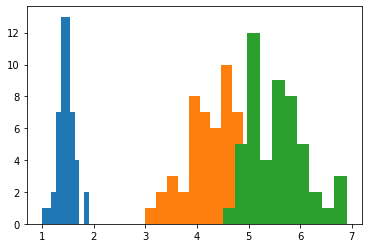

In [9]:
plt.hist(x[y == 0,2])  ## Grupo 0 y 2° variable  (En "x" tenemos distintas medidas como: ancho,largo,etc , y en "y" tenemos los tipos de flores)
plt.hist(x[y == 1,2])  ## Grupo 1 y 2° Variable
plt.hist(x[y == 2,2])  ## Grupo 2 y 2° Variable
plt.show()

Histogramas con transparencias

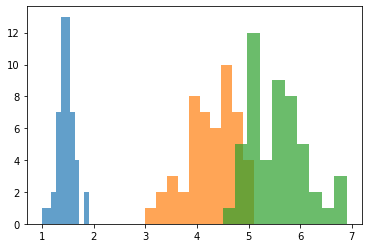

In [25]:
plt.hist(x[y == 0,2],alpha=0.7)
plt.hist(x[y == 1,2],alpha=0.7)
plt.hist(x[y == 2,2],alpha=0.7)
plt.show()

Densidades Kernels



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



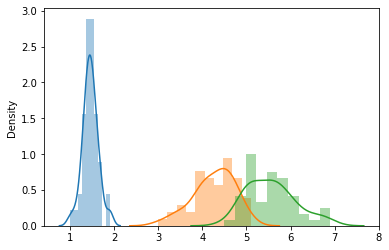

In [30]:
sns.distplot(x[y== 0,2], bins =10)
sns.distplot(x[y== 1,2], bins =10)
sns.distplot(x[y== 2,2], bins =10)
plt.show()

KDE (Kernel density estimation) de una sola variable

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



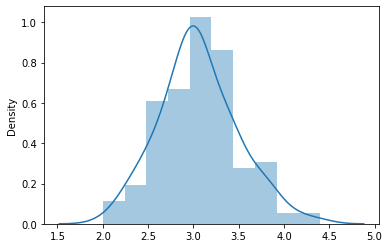

In [37]:
sns.distplot(x[:,1],bins=10) # To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals.
plt.show()

Scatterplot

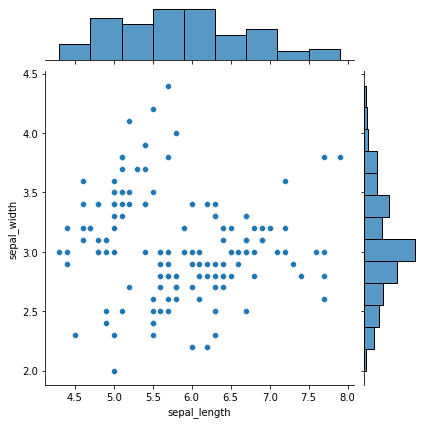

In [39]:
# Scatterplot donde salen también histogramas
fig= sns.jointplot(x = 'sepal_length', y='sepal_width', data=iris)

In [41]:
# Scatterplot en 3d y con Movimiento

iris= px.data.iris()
fig = px.scatter_3d(iris, x='sepal_length', y='sepal_width', z='petal_width',
                    color='species') 
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



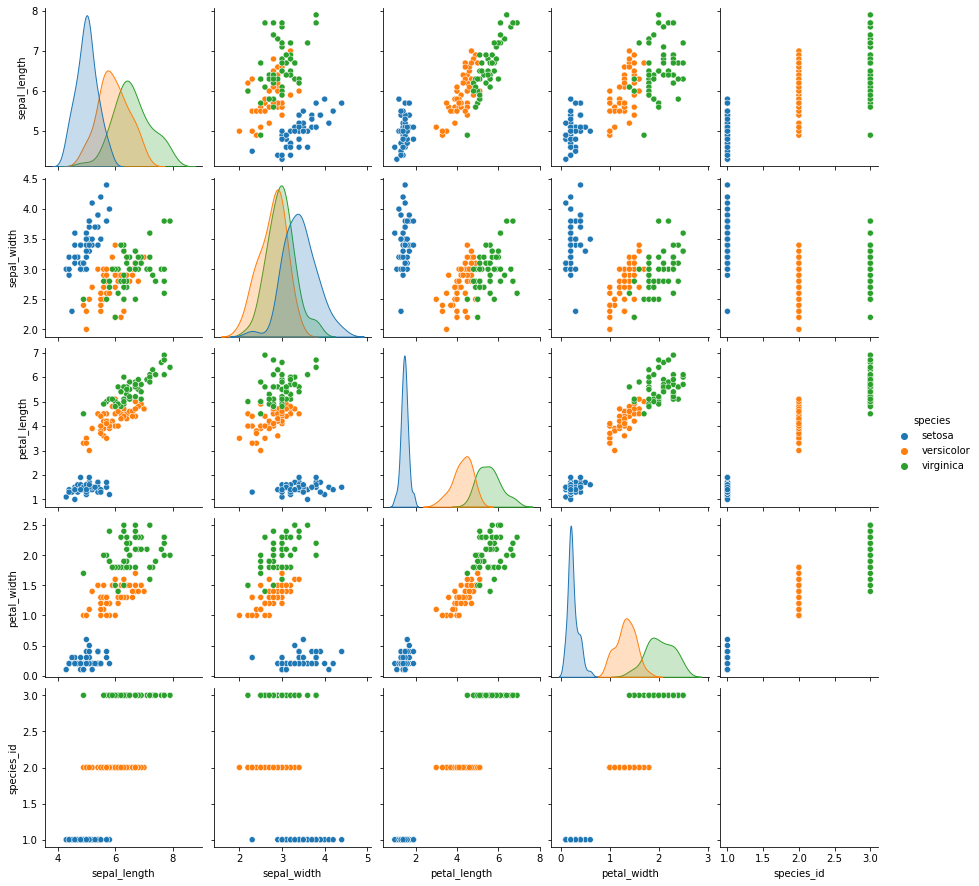

In [44]:
# Scatterplot matrix (kde en la diagonal)
sns.pairplot(iris,hue='species')
plt.show()

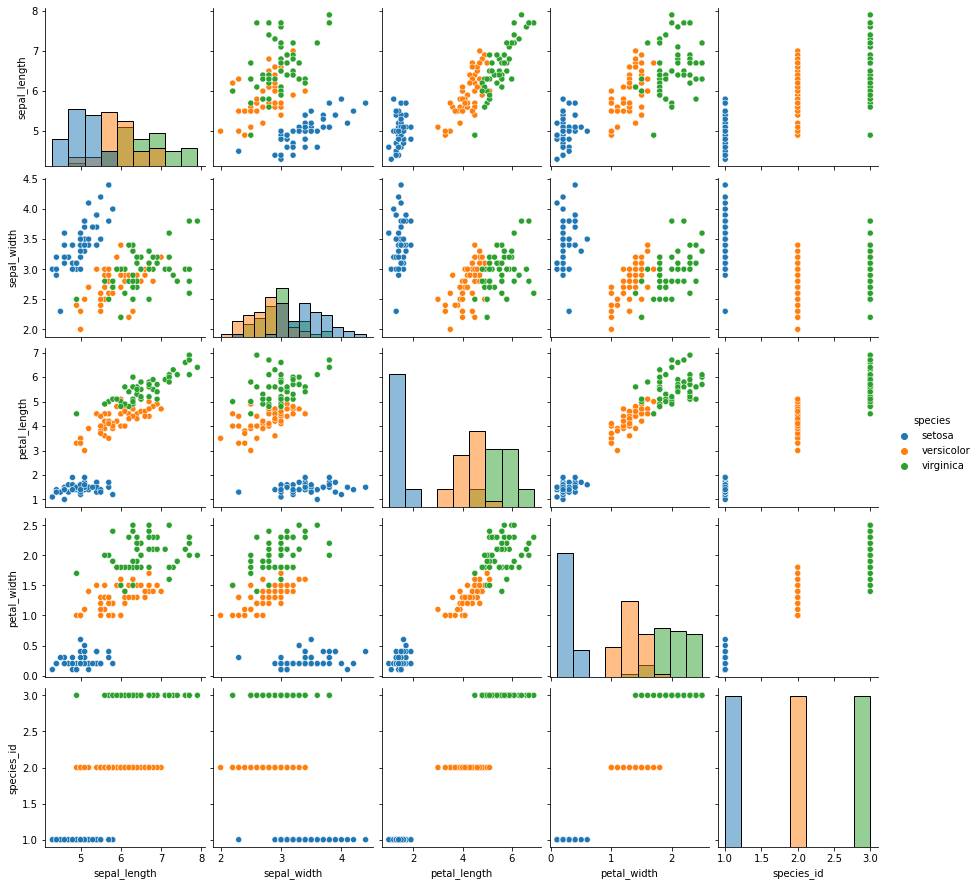

In [45]:
#Scatterplot matrix (histogramas en la diagonal)
sns.pairplot(iris,hue='species', diag_kind='hist')
plt.show()

In [46]:
# Otra forma de cargar los datos IRIS (con seaborn - sns)
iris = sns.load_dataset("iris")
print(iris.head()) # no tiene variable Id, las demas vbles se llaman diferentes y las categorias tambien

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [54]:
# help(sns.kdeplot)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:1678: UserWarning:

`shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.



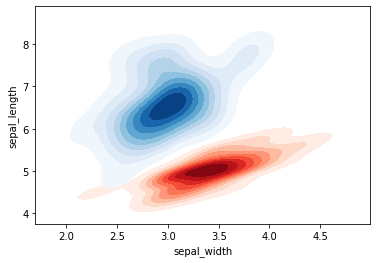

In [53]:

# Densidad kernel bidimensional
setosa = iris.loc[iris.species == "setosa"]
virginica = iris.loc[iris.species == "virginica"]
ax = sns.kdeplot(setosa.sepal_width, setosa.sepal_length,
                 cmap="Reds", shade=True, shade_lowest=False) # shade_loswest, If False, the area below the lowest contour will be transparent
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length,
               cmap="Blues", shade=True, shade_lowest=False)

Matriz de Covarianza
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      0.685694    -0.042434      1.274315     0.516271
sepal_width      -0.042434     0.189979     -0.329656    -0.121639
petal_length      1.274315    -0.329656      3.116278     1.295609
petal_width       0.516271    -0.121639      1.295609     0.581006
Matriz de Correlaciones
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


(4.5, -0.5)

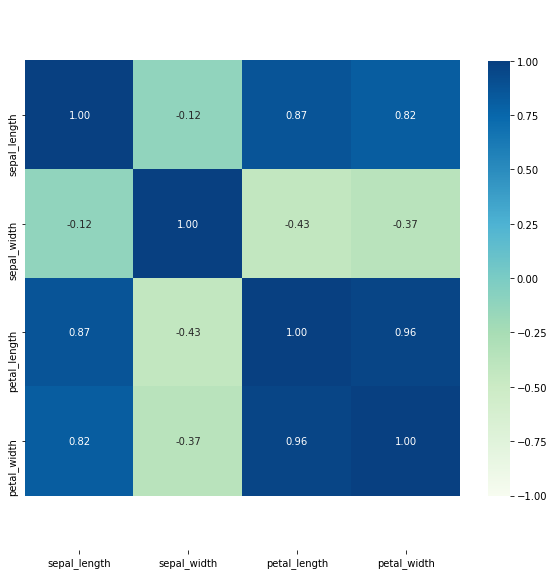

In [48]:
# Matriz de covarianza numerica 
cov_matrix = iris.cov()

# Matriz de correlaciones numerica 
correlation_matrix = iris.corr()
print('Matriz de Covarianza')
print(cov_matrix)
print('Matriz de Correlaciones')
print(correlation_matrix)

# Matriz de correlaciones gráfica 
plt.figure(figsize=(10,10))
ax=sns.heatmap(correlation_matrix,  vmax=1, vmin=-1,cbar_kws={"shrink": .8},square=True, annot=True,fmt='.2f', cmap ='GnBu',center=0)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

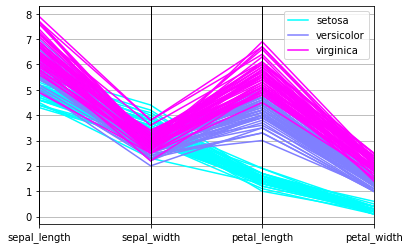

In [56]:
#Coordenadas paralelas
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "species",colormap='cool')
plt.show()

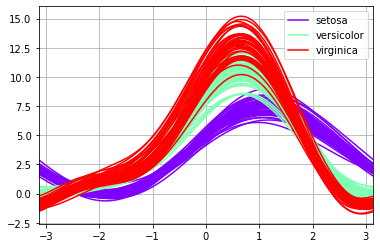

In [50]:
#Curvas de Andrews

andrews_curves(iris,"species",colormap='rainbow')
plt.show()

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


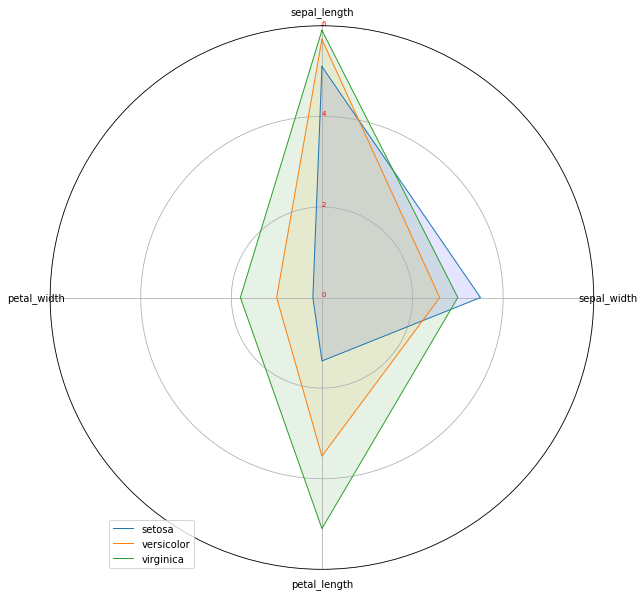

In [51]:
#Grafico Radial
new_iris=iris.drop('species',axis=1)
print(new_iris.head()) # le quitamos la variable species
categories = list(iris)[:4]
N = len(categories)
angles = [ n / float(N)*2*pi for n in range(N)]
angles = angles + angles[:1]
plt.figure(figsize = (10,10))
ax = plt.subplot(111,polar = True)
ax.set_theta_offset(pi/2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1],categories)
ax.set_rlabel_position(0)
plt.yticks([0,2,4,6],["0","2","4","6"],color= "red", size = 7)
plt.ylim(0,6)

values = new_iris.loc[0].values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label='setosa' )
ax.fill(angles,values,"b",alpha=0.1)


values = new_iris.loc[79].values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label='versicolor' )
ax.fill(angles,values,"orange",alpha=0.1)


values = new_iris.loc[149].values.flatten().tolist()
values = values + values[:1]
ax.plot(angles,values,linewidth = 1,linestyle="solid",label='virginica' )
ax.fill(angles,values,"green",alpha=0.1)

plt.legend(loc = "upper left",bbox_to_anchor = (0.1,0.1))
plt.show()